   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True
userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64
['gate_30' 'gate_40']
Group A size: 44700
Group B size: 45489
         sum_gamerounds  retention_1  retention_7
version                                          
gate_30       52.456264     0.448188     0.190201
gate_40       51.298776     0.442283     0.182000
Sum Gamerounds T-istatistiği: 0.89, P-değeri: 0.3729
Retention 1 T-istatistiği: 1.78, P-değeri: 0.0744
Retention 7 T-istatistiği: 3.16, P-değeri: 0.0016
Sum Gamerounds için: Gate 30 ve Gate 40 grupları arasında anlamlı bir fark yok.
Retention 1 için: Gate 30 

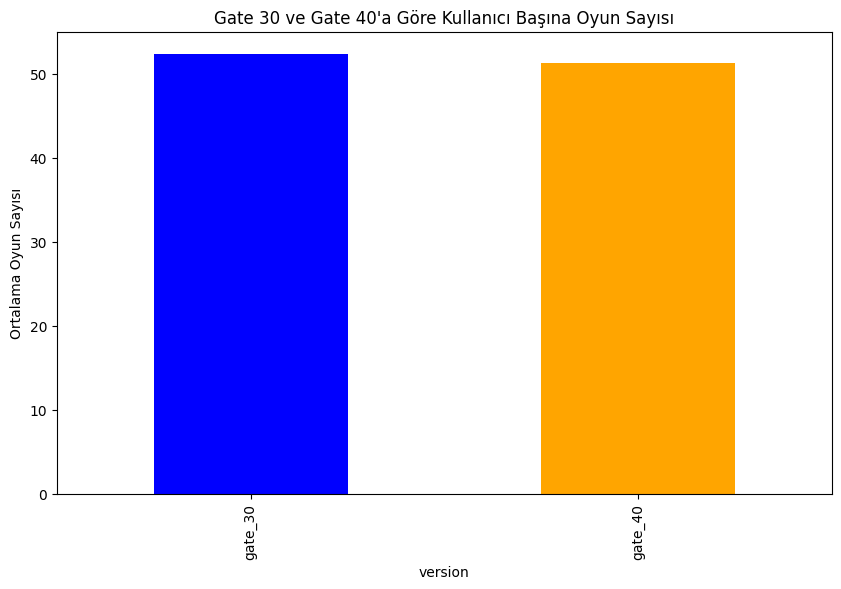

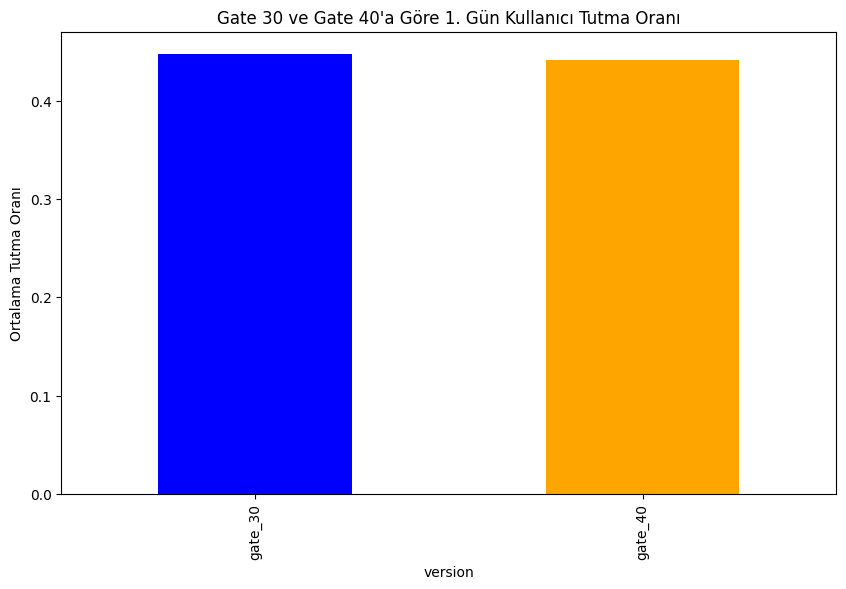

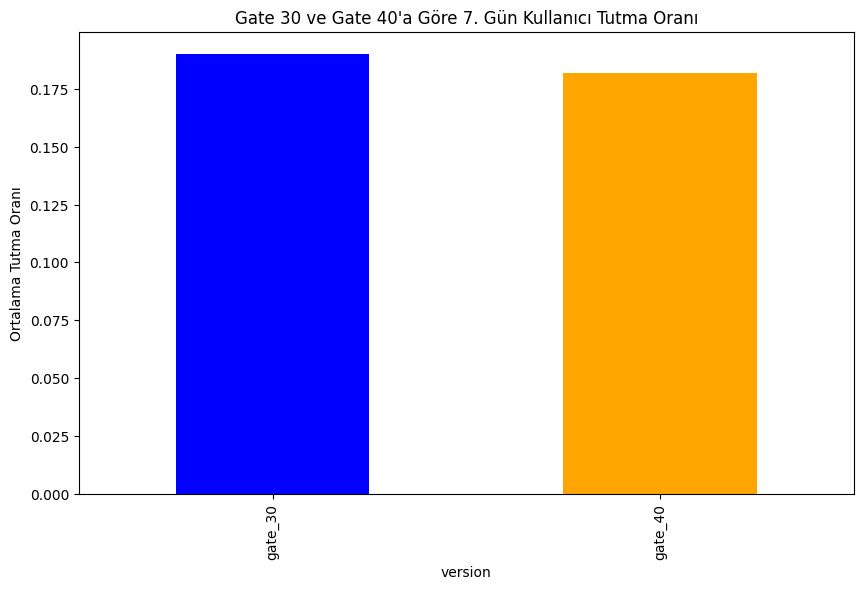

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

data = pd.read_csv('/kaggle/input/mobile-games-ab-testing/cookie_cats.csv')

print(data.head())

print(data.isnull().sum())

print(data['version'].unique())

group_a = data[data['version'] == 'gate_30']  # gate_30 grubu
group_b = data[data['version'] == 'gate_40']  # gate_40 grubu

print(f"Group A size: {group_a.shape[0]}")
print(f"Group B size: {group_b.shape[0]}")

version_stats = data.groupby('version')[['sum_gamerounds', 'retention_1', 'retention_7']].mean()
print(version_stats)

data['retention_1'] = data['retention_1'].astype(int)
data['retention_7'] = data['retention_7'].astype(int)

group_a = data[data['version'] == 'gate_30']
group_b = data[data['version'] == 'gate_40']

t_stat_gamerounds, p_value_gamerounds = ttest_ind(group_a['sum_gamerounds'], group_b['sum_gamerounds'])

t_stat_retention_1, p_value_retention_1 = ttest_ind(group_a['retention_1'], group_b['retention_1'])

t_stat_retention_7, p_value_retention_7 = ttest_ind(group_a['retention_7'], group_b['retention_7'])

print(f"Sum Gamerounds T-istatistiği: {t_stat_gamerounds:.2f}, P-değeri: {p_value_gamerounds:.4f}")
print(f"Retention 1 T-istatistiği: {t_stat_retention_1:.2f}, P-değeri: {p_value_retention_1:.4f}")
print(f"Retention 7 T-istatistiği: {t_stat_retention_7:.2f}, P-değeri: {p_value_retention_7:.4f}")

alpha = 0.05

if p_value_gamerounds < alpha:
    print("Sum Gamerounds için: Gate 30 ve Gate 40 grupları arasında anlamlı bir fark var.")
else:
    print("Sum Gamerounds için: Gate 30 ve Gate 40 grupları arasında anlamlı bir fark yok.")

if p_value_retention_1 < alpha:
    print("Retention 1 için: Gate 30 ve Gate 40 grupları arasında anlamlı bir fark var.")
else:
    print("Retention 1 için: Gate 30 ve Gate 40 grupları arasında anlamlı bir fark yok.")

if p_value_retention_7 < alpha:
    print("Retention 7 için: Gate 30 ve Gate 40 grupları arasında anlamlı bir fark var.")
else:
    print("Retention 7 için: Gate 30 ve Gate 40 grupları arasında anlamlı bir fark yok.")

plt.figure(figsize=(10, 6))
data.groupby('version')['sum_gamerounds'].mean().plot(kind='bar', color=['blue', 'orange'])
plt.title("Gate 30 ve Gate 40'a Göre Kullanıcı Başına Oyun Sayısı")
plt.ylabel("Ortalama Oyun Sayısı")
plt.show()

plt.figure(figsize=(10, 6))
data.groupby('version')['retention_1'].mean().plot(kind='bar', color=['blue', 'orange'])
plt.title("Gate 30 ve Gate 40'a Göre 1. Gün Kullanıcı Tutma Oranı")
plt.ylabel("Ortalama Tutma Oranı")
plt.show()

plt.figure(figsize=(10, 6))
data.groupby('version')['retention_7'].mean().plot(kind='bar', color=['blue', 'orange'])
plt.title("Gate 30 ve Gate 40'a Göre 7. Gün Kullanıcı Tutma Oranı")
plt.ylabel("Ortalama Tutma Oranı")
plt.show()
